In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(512, 512, 3)


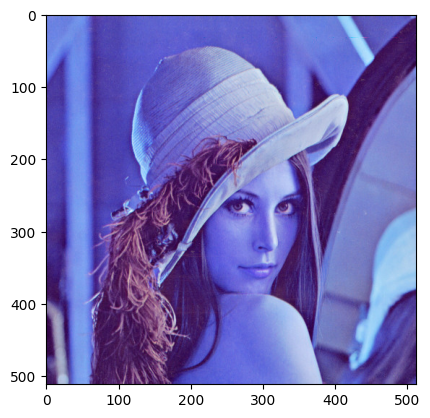

In [4]:
orgImg = cv2.imread('Lena.png')
print(orgImg.shape)
plt.imshow(orgImg)

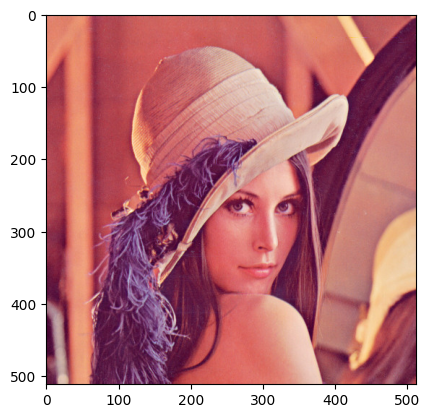

In [5]:
plt.imshow(
    cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB)
)

In [7]:
kernel = (3, 3)
gaussianImg = cv2.GaussianBlur(orgImg, kernel, 0)
print(gaussianImg)

[[[125 137 225]
  [127 136 225]
  [130 136 225]
  ...
  [119 145 228]
  [107 128 217]
  [ 99 115 211]]

 [[125 137 225]
  [127 136 225]
  [129 136 225]
  ...
  [119 144 229]
  [108 128 218]
  [101 115 211]]

 [[127 137 225]
  [128 137 225]
  [128 137 224]
  ...
  [118 143 230]
  [109 127 220]
  [102 115 212]]

 ...

 [[ 56  21  82]
  [ 58  23  85]
  [ 61  26  91]
  ...
  [ 81  69 175]
  [ 80  68 175]
  [ 79  67 175]]

 [[ 55  20  81]
  [ 58  23  85]
  [ 62  27  92]
  ...
  [ 80  69 178]
  [ 81  71 180]
  [ 82  71 181]]

 [[ 56  20  82]
  [ 58  23  86]
  [ 63  28  93]
  ...
  [ 79  70 180]
  [ 81  72 183]
  [ 82  74 184]]]


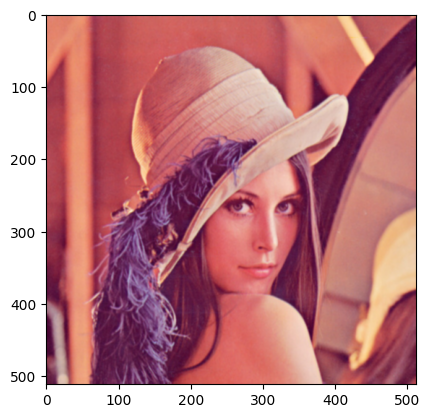

In [8]:
plt.imshow(
    cv2.cvtColor(gaussianImg, cv2.COLOR_BGR2RGB)
)

In [9]:
fig = plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Original')

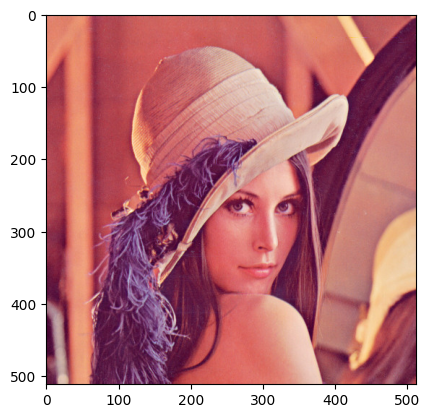

In [14]:
ax = fig.add_subplot(1, 2, 1)
implot = plt.imshow(
    cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB)
)
ax.set_title('Original')

Text(0.5, 1.0, 'Gaussian')

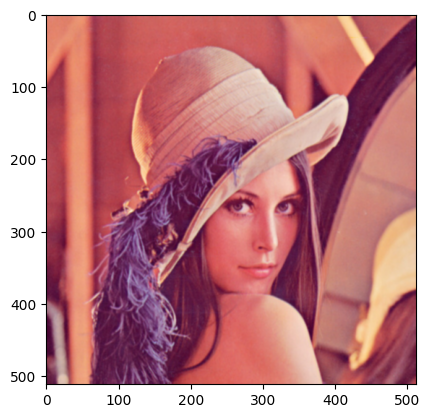

In [11]:
ax = fig.add_subplot(1, 2, 2)
implot = plt.imshow(
    cv2.cvtColor(gaussianImg, cv2.COLOR_BGR2RGB)
)
ax.set_title('Gaussian')

In [15]:
grayImg = cv2.cvtColor(gaussianImg, cv2.COLOR_BGR2GRAY)
grayImg.shape
print(grayImg)

[[162 162 162 ... 167 152 142]
 [162 162 162 ... 167 153 142]
 [162 162 162 ... 166 153 143]
 ...
 [ 43  46  49 ... 102 101 101]
 [ 42  46  50 ... 103 105 105]
 [ 43  46  51 ... 104 106 108]]


Text(0.5, 1.0, 'Gaussian')

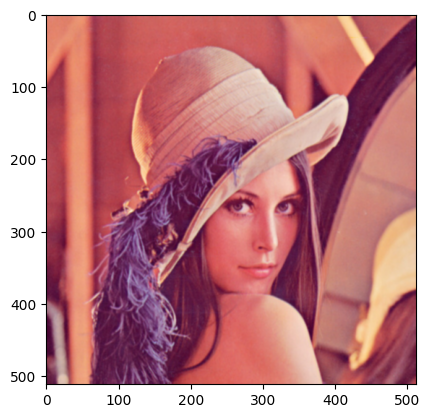

In [17]:
ax = fig.add_subplot(1, 2, 1)
implot = plt.imshow(
    cv2.cvtColor(gaussianImg, cv2.COLOR_BGR2RGB)
)
ax.set_title('Gaussian')

Text(0.5, 1.0, 'Gaussian BLur + Gray')

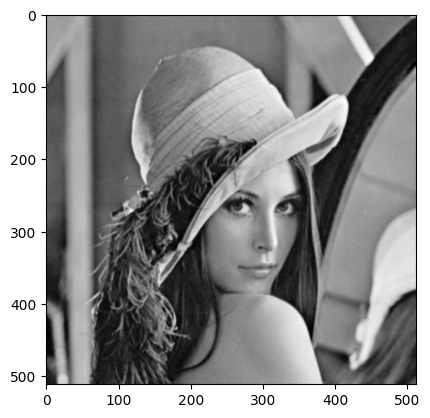

In [19]:
ax = fig.add_subplot(1, 2, 2)
implot = plt.imshow(
    grayImg, cmap='gray'
)
ax.set_title('Gaussian BLur + Gray')

# Grad X Image

In [20]:
ddepth = cv2.CV_16S
gradXImg = cv2.Sobel(grayImg, ddepth, 1, 0)
print(gradXImg)

[[   0    0   -2 ...  -70 -100    0]
 [   0    0   -3 ...  -68  -98    0]
 [   0   -1   -4 ...  -67  -95    0]
 ...
 [   0   22   18 ...    4   -3    0]
 [   0   30   24 ...   10    7    0]
 [   0   32   26 ...   12   12    0]]


In [21]:
absGradXImg = cv2.convertScaleAbs(gradXImg)
print(absGradXImg)

[[  0   0   2 ...  70 100   0]
 [  0   0   3 ...  68  98   0]
 [  0   1   4 ...  67  95   0]
 ...
 [  0  22  18 ...   4   3   0]
 [  0  30  24 ...  10   7   0]
 [  0  32  26 ...  12  12   0]]


Text(0.5, 1.0, 'Gray Image')

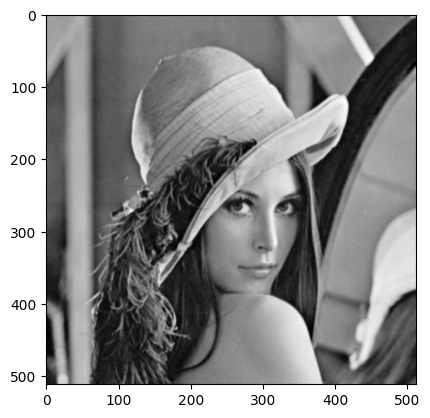

In [23]:
ax = fig.add_subplot(1, 2, 1)
implot = plt.imshow(
    grayImg, cmap='gray'
)
ax.set_title('Gray Image')

Text(0.5, 1.0, 'Gaussian by X')

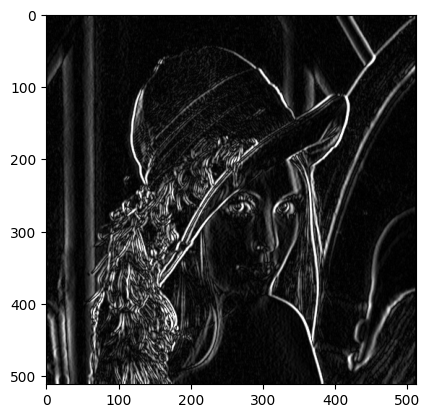

In [24]:
ax = fig.add_subplot(1, 2, 2)
implot = plt.imshow(
    absGradXImg, cmap='gray'
)
ax.set_title('Gaussian by X')

# Grad Y Image

In [25]:
gradYImg = cv2.Sobel(grayImg, ddepth, 0, 1)
print(gradYImg)

[[  0   0   0 ...   0   0   0]
 [  0   0  -1 ...  -2   2   4]
 [  2   1   0 ...  -3  -3  -2]
 ...
 [-12  -6   4 ...  18  27  32]
 [  0   2   6 ...  12  19  24]
 [  0   0   0 ...   0   0   0]]


In [26]:
absGradYImg = cv2.convertScaleAbs(gradYImg)
print(absGradYImg)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  2  2  4]
 [ 2  1  0 ...  3  3  2]
 ...
 [12  6  4 ... 18 27 32]
 [ 0  2  6 ... 12 19 24]
 [ 0  0  0 ...  0  0  0]]


Text(0.5, 1.0, 'Gray Image')

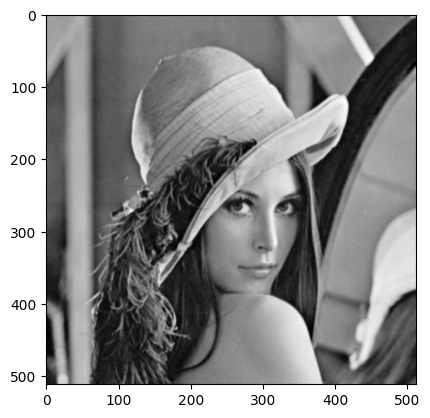

In [27]:
ax = fig.add_subplot(1, 2, 1)
implot = plt.imshow(
    grayImg, cmap='gray'
)
ax.set_title('Gray Image')

Text(0.5, 1.0, 'Gradient by Y')

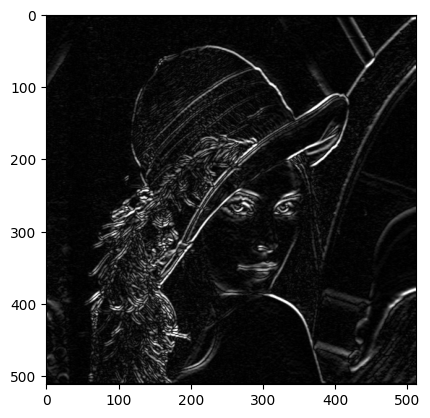

In [28]:
ax = fig.add_subplot(1, 2, 2)
implot = plt.imshow(
    absGradYImg, cmap='gray'
)
ax.set_title('Gradient by Y')

# Compute gradient

In [29]:
gradImg = cv2.addWeighted(absGradXImg, 0.5, absGradYImg, 0.5, 0)
print(gradImg.shape)
print(gradImg)

(512, 512)
[[ 0  0  1 ... 35 50  0]
 [ 0  0  2 ... 35 50  2]
 [ 1  1  2 ... 35 49  1]
 ...
 [ 6 14 11 ... 11 15 16]
 [ 0 16 15 ... 11 13 12]
 [ 0 16 13 ...  6  6  0]]


In [ ]:
ax = fig.add_subplot(1, 2, 2)
implot = plt.imshow(
    grayImg, cmap='gray'
)
ax.set_title('Gray Image')